C:\Users\ghwns\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\ghwns\AppData\Local\Temp\ipykernel_17608\32716443.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Train shape: (891, 12)
Test shape: (418, 11)
        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age

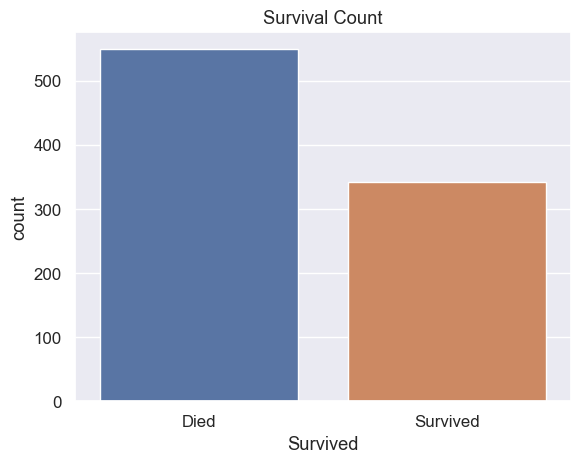

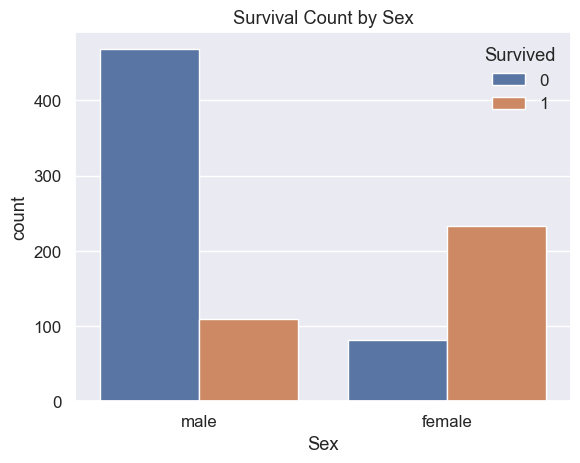

C:\Users\ghwns\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


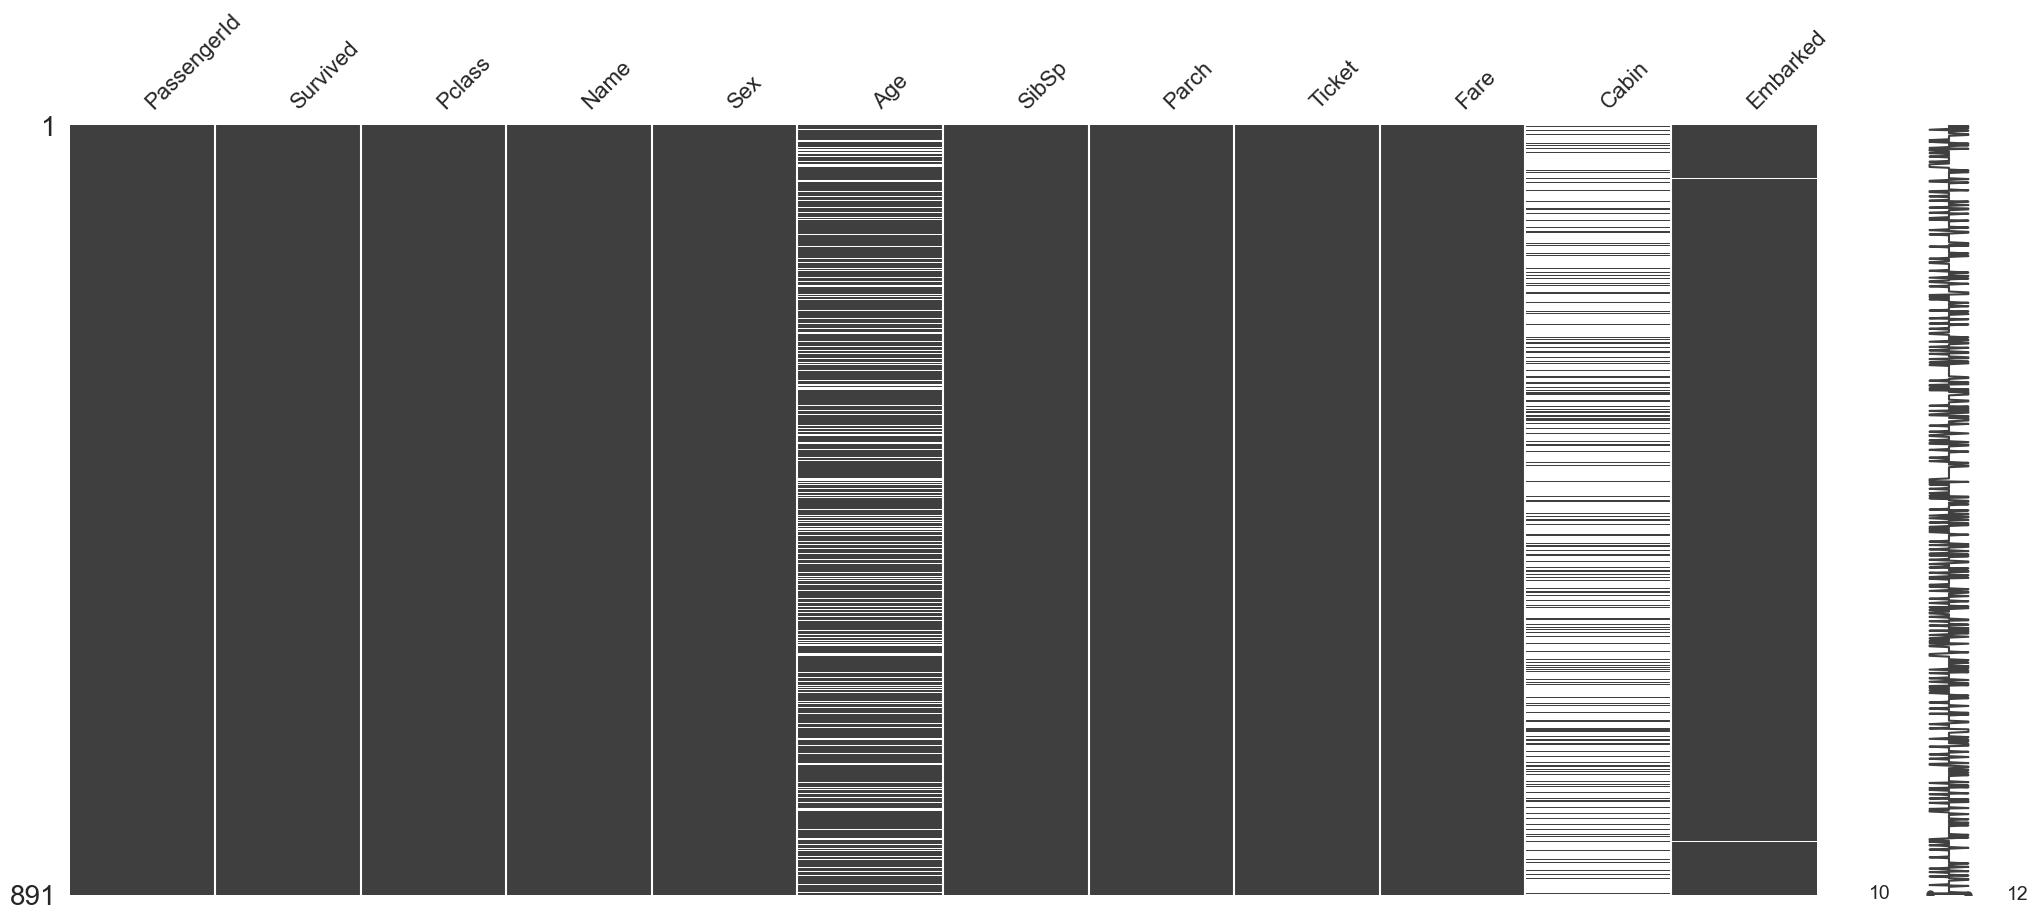

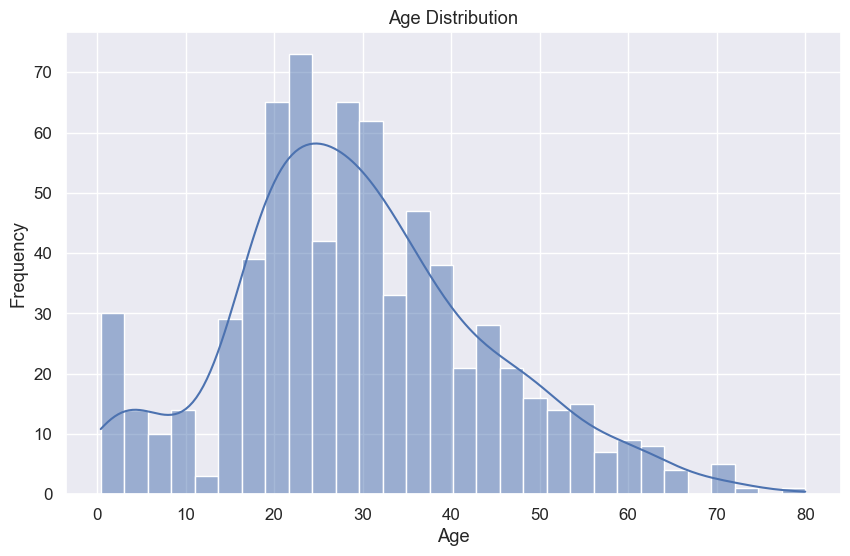

C:\Users\ghwns\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ghwns\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


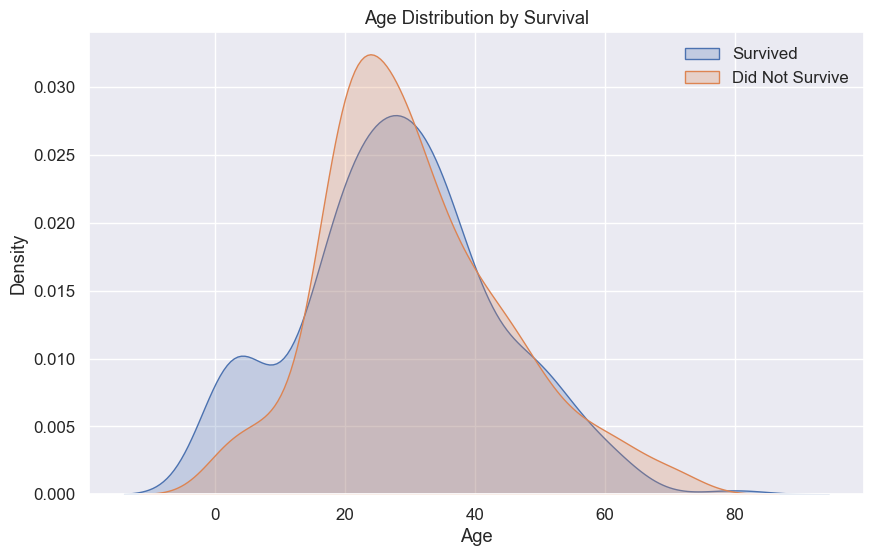

C:\Users\ghwns\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


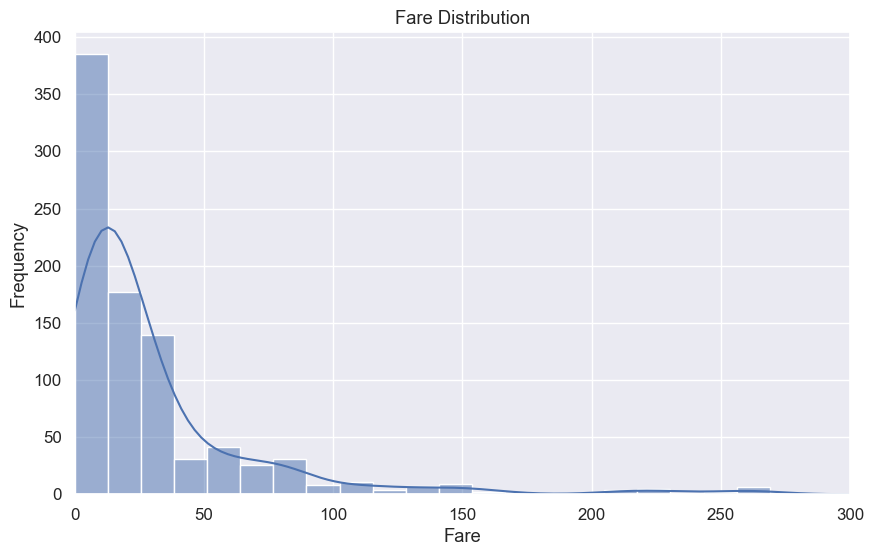

C:\Users\ghwns\AppData\Local\Temp\ipykernel_17608\32716443.py:77: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)
C:\Users\ghwns\AppData\Local\Temp\ipykernel_17608\32716443.py:78: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [1]:
# Titanic Survival Prediction - EDA and Feature Engineering

# ========================================
# 1. Import Libraries and Load the Data
# ========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-whitegrid')
sns.set(font_scale=1.1)

# Load datasets
train_path = r"C:\\Users\\ghwns\\HJ_git\\titanic-survival-prediction\\data\\train.csv"
test_path = r"C:\\Users\\ghwns\\HJ_git\\titanic-survival-prediction\\data\\test.csv"
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

print("Train shape:", train.shape)
print("Test shape:", test.shape)

# ========================================
# 2. Basic Data Check
# ========================================
print(train.describe(include='all'))
print(train.isnull().sum().sort_values(ascending=False))

# ========================================
# 3. Exploratory Data Analysis (EDA)
# ========================================
# Survival Count
sns.countplot(data=train, x='Survived')
plt.title('Survival Count')
plt.xticks([0, 1], ['Died', 'Survived'])
plt.show()

# Survival by Sex
sns.countplot(data=train, x='Sex', hue='Survived')
plt.title('Survival Count by Sex')
plt.show()

# Visualize Missing Values
!pip install missingno
import missingno as msno
msno.matrix(train)

# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(train['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Age Distribution by Survival
plt.figure(figsize=(10, 6))
sns.kdeplot(data=train[train['Survived'] == 1], x='Age', label='Survived', fill=True)
sns.kdeplot(data=train[train['Survived'] == 0], x='Age', label='Did Not Survive', fill=True)
plt.title('Age Distribution by Survival')
plt.legend()
plt.show()

# Fare Distribution
plt.figure(figsize=(10, 6))
sns.histplot(train['Fare'], bins=40, kde=True)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.xlim(0, 300)
plt.show()

# ========================================
# 4. Handle Missing Values
# ========================================
# Fill missing Age values with median
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)

# Fill missing Fare values in test set with median
test['Fare'].fillna(test['Fare'].median(), inplace=True)

# Drop rows with missing Embarked values
train.dropna(subset=['Embarked'], inplace=True)

# ========================================
# 5. Feature Engineering
# ========================================
# 5-1. Create Has_Cabin feature
train['Has_Cabin'] = train['Cabin'].notnull().astype(int)
test['Has_Cabin'] = test['Cabin'].notnull().astype(int)

# Drop Cabin column
train.drop(columns=['Cabin'], inplace=True)
test.drop(columns=['Cabin'], inplace=True)

# 5-2. Extract Title from Name
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\\.', expand=False)
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\\.', expand=False)

# Group rare titles
rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
train['Title'] = train['Title'].replace(rare_titles, 'Rare')
test['Title'] = test['Title'].replace(rare_titles, 'Rare')

# Merge similar titles
train['Title'] = train['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})
test['Title'] = test['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})

# 5-3. Create FamilySize and IsAlone features
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

train['IsAlone'] = 0
train.loc[train['FamilySize'] == 1, 'IsAlone'] = 1

test['IsAlone'] = 0
test.loc[test['FamilySize'] == 1, 'IsAlone'] = 1

# 5-4. Bin Age (AgeBand)
train['AgeBand'] = pd.cut(train['Age'], bins=[0, 16, 32, 48, 64, 100], labels=[0, 1, 2, 3, 4])
test['AgeBand'] = pd.cut(test['Age'], bins=[0, 16, 32, 48, 64, 100], labels=[0, 1, 2, 3, 4])

# 5-5. Bin Fare (FareBand)
train['FareBand'] = pd.qcut(train['Fare'], 4, labels=[0, 1, 2, 3])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels=[0, 1, 2, 3])

# 5-6. One-Hot Encode Embarked
train = pd.get_dummies(train, columns=['Embarked'], prefix='Embarked')
test = pd.get_dummies(test, columns=['Embarked'], prefix='Embarked')

# ========================================
# 6. Drop Unnecessary Columns
# ========================================
unnecessary_cols = ['PassengerId', 'Name', 'Ticket']
train.drop(columns=unnecessary_cols, inplace=True)
test.drop(columns=unnecessary_cols, inplace=True)

# ========================================
# (Optional) Save Processed Data
# ========================================
# train.to_csv('train_processed.csv', index=False)
# test.to_csv('test_processed.csv', index=False)